## Figure 2

In [16]:
# Load the result file
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open("result/res_nf.pkl", "rb") as f:
    list_result, W_list, list_origin,_ = pickle.load(f)

with open("result/res_tf.pkl", "rb") as f:
    list_result2, W_list2, list_origin2,_,_ = pickle.load(f)

ax2 = [[a[x][:21] for x in range(10)] for a in list_result2]
ax2 = np.array(ax2)
ax2 = ax2[:,:,:,:,1] 

ax = [[a[x][:21] for x in range(10)] for a in list_result]
ax = np.array(ax)
ax = ax[:,:,:,:,1]

In [17]:
ratio_list = np.array([x/10 for x in list(range(1,11))])
candidate_m_syn=  np.array([x * 0.1 for x in range(0,21)])
candidate_alpha_scale= np.array([0.1, 0.2, 0.3,0.4, 0.5,0.6, 0.7,0.8, 0.9])

In [18]:
def get_argmin_pairwise(ax_data, axis_fixed, val_fixed, xvals_1, xvals_2):
    """
    For each fixed value, get argmin over the other two dimensions.
    Returns mean and std of the argmin x-values (converted).
    """
    mean_1, std_1 = [], []
    mean_2, std_2 = [], []

    n_repeats = ax_data.shape[0]
    for i in range(len(val_fixed)):
        vals_1 = []
        vals_2 = []
        for rep in range(n_repeats):
            if axis_fixed == 2:  # Fix m/n
                mat = ax_data[rep, :, i, :]  # (split, alpha)
                idx1, idx2 = np.unravel_index(np.argmin(mat), mat.shape)
                vals_1.append(xvals_1[idx1])  # split
                vals_2.append(xvals_2[idx2])  # alpha

            elif axis_fixed == 3:  # Fix alpha
                mat = ax_data[rep, :, :, i]  # (split, m/n)
                idx1, idx2 = np.unravel_index(np.argmin(mat), mat.shape)
                vals_1.append(xvals_1[idx2])  # m/n
                vals_2.append(xvals_2[idx1])  # split

            elif axis_fixed == 1:  # Fix split
                mat = ax_data[rep, i, :, :]  # (m/n, alpha)
                idx1, idx2 = np.unravel_index(np.argmin(mat), mat.shape)
                vals_1.append(xvals_1[idx1])  # m/n
                vals_2.append(xvals_2[idx2])  # alpha

        mean_1.append(np.mean(vals_1))
        std_1.append(np.std(vals_1))
        mean_2.append(np.mean(vals_2))
        std_2.append(np.std(vals_2))

    return np.array(mean_1), np.array(std_1), np.array(mean_2), np.array(std_2)

In [19]:
# Input axes
split_vals = ratio_list             # len = 10
mn_vals = candidate_m_syn           # len = 20
alpha_vals = candidate_alpha_scale  # len = 9

# Row 1: Fix m/n (axis=2)
mn_x = candidate_m_syn
mns_1, stds_1, alphas_1, stds_2 = get_argmin_pairwise(ax, 2, mn_x, split_vals, alpha_vals)
mns_1_t, stds_1_t, alphas_1_t, stds_2_t = get_argmin_pairwise(ax2, 2, mn_x, split_vals, alpha_vals)

# Row 2: Fix alpha (axis=3)
alpha_x = candidate_alpha_scale
mns_2, stds_3, splits_2, stds_4 = get_argmin_pairwise(ax, 3, alpha_x, mn_vals, split_vals)
mns_2_t, stds_3_t, splits_2_t, stds_4_t = get_argmin_pairwise(ax2, 3, alpha_x, mn_vals, split_vals)

# Row 3: Fix split (axis=1)
split_x = ratio_list
mns_3, stds_5, alphas_3, stds_6 = get_argmin_pairwise(ax, 1, split_x, mn_vals, alpha_vals)
mns_3_t, stds_5_t, alphas_3_t, stds_6_t = get_argmin_pairwise(ax2, 1, split_x, mn_vals, alpha_vals)


<ipython-input-21-dbbcd9e32035>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


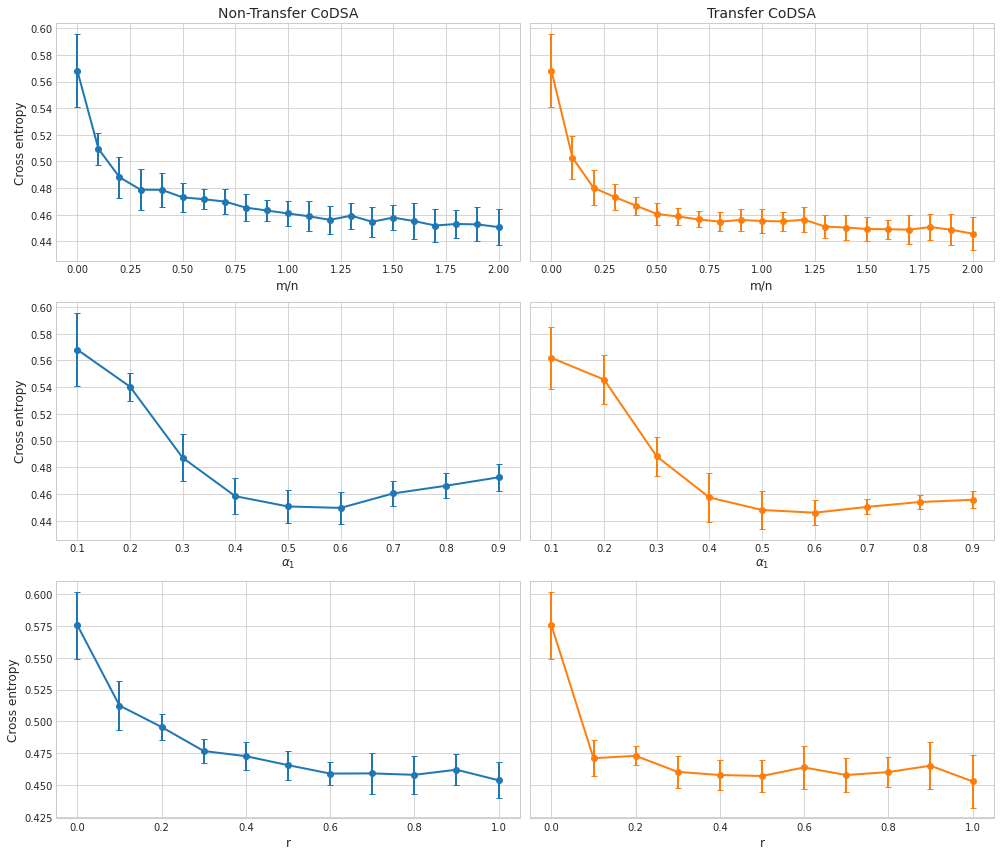

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Use a professional style (optional)
plt.style.use('seaborn-whitegrid')

# ----- Assume these arrays are computed from your experiments -----
# ax: nontransfer results, shape (10, 10, 20, 9, 2)
# ax2: transfer results, originally computed from list_result2, then processed:
ax2 = [[a[x][:21] for x in range(10)] for a in list_result2]
ax2 = np.array(ax2)
ax2 = ax2[:,:,:,:,1] # Now shape: (10, 10, 20, 9)

ax = [[a[x][:21] for x in range(10)] for a in list_result]
ax = np.array(ax)
ax = ax[:,:,:,:,1]  # Now shape: (10, 10, 20, 9)

# ----- Compute metrics for Nontransfer (using ax and list_origin) -----
# Row 1: For each candidate synthetic sample size (axis=2), we take min over minority ratio (axis=3) and split ratio (axis=1)
val_err_nontrans = np.min(np.min(ax, axis=3), axis=1)  # shape: (10,20)
col_means_nontrans_1 = np.mean(val_err_nontrans, axis=0)  # shape: (20,)
col_std_nontrans_1   = np.std(val_err_nontrans, axis=0)   # shape: (20,)

# Row 2: For candidate minority ratios along axis=3, collapse over split ratio (axis=1) and candidate m_syn (axis=2)
val_err_nontrans_2 = np.min(ax, axis=(1,2))  # shape: (10,9)
col_means_nontrans_2 = np.mean(val_err_nontrans_2, axis=0)  # shape: (9,)
col_std_nontrans_2   = np.std(val_err_nontrans_2, axis=0)   # shape: (9,)

# Row 3: For each split ratio (axis=1), take min over candidate m_syn and minority ratio (axes 2 and 3)
split_err = np.min(ax, axis=(2,3))  # shape: (10,10)
col_means_nontrans_3 = np.mean(split_err, axis=0)  # shape: (10,)
col_std_nontrans_3   = np.std(split_err, axis=0)   # shape: (10,)

# Incorporate a baseline from list_origin at split ratio = 0.
baseline_nontrans = np.array(list_origin)[:,1]  # shape: (10,)
mean_baseline = np.mean(baseline_nontrans)
std_baseline = np.std(baseline_nontrans)
x_split = np.concatenate(([0], ratio_list))
col_means_nontrans_3 = np.concatenate(([mean_baseline], col_means_nontrans_3))
col_std_nontrans_3   = np.concatenate(([std_baseline], col_std_nontrans_3))

# ----- Compute metrics for Transfer (using ax2 and list_origin2) -----
# Row 1: Candidate synthetic sample sizes vs RMSE.
val_err_transfer_1 = np.min(np.min(ax2, axis=3), axis=1)  # shape: (10,20)
col_means_trans_1 = np.mean(val_err_transfer_1, axis=0)    # shape: (20,)
col_std_trans_1   = np.std(val_err_transfer_1, axis=0)     # shape: (20,)

# Row 2: Candidate minority ratios vs RMSE.
val_err_transfer_2 = np.min(ax2, axis=(1,2))  # shape: (10,9)
col_means_trans_2 = np.mean(val_err_transfer_2, axis=0)    # shape: (9,)
col_std_trans_2   = np.std(val_err_transfer_2, axis=0)     # shape: (9,)

# Row 3: Split ratio vs RMSE for transfer.
split_err_trans = np.min(ax2, axis=(2,3))  # shape: (10,10)
col_means_trans_3 = np.mean(split_err_trans, axis=0)  # shape: (10,)
col_std_trans_3   = np.std(split_err_trans, axis=0)   # shape: (10,)
x_split_trans = np.concatenate(([0], ratio_list))

baseline_trans = np.array(list_origin2)[:,1] if 'list_origin2' in globals() else np.zeros(10)
mean_baseline_trans = np.mean(baseline_trans)
std_baseline_trans = np.std(baseline_trans)
col_means_trans_3 = np.concatenate(([mean_baseline_trans], col_means_trans_3))
col_std_trans_3   = np.concatenate(([std_baseline_trans], col_std_trans_3))

# ----- Create figure with 3 rows and 2 columns, sharing the y-axis for each row -----
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey='row', sharex=False)

# Row 1: Candidate synthetic sample sizes vs metric
axes[0, 0].errorbar(candidate_m_syn, col_means_nontrans_1,
                    yerr=col_std_nontrans_1, fmt='o-', color='tab:blue',
                    markersize=6, linewidth=2, capsize=3)
axes[0, 0].set_xlabel("m/n", fontsize=12)
axes[0, 0].set_ylabel("Cross entropy", fontsize=12)
axes[0, 0].set_title("Non-Transfer CoDSA", fontsize=14)

axes[0, 1].errorbar(candidate_m_syn, col_means_trans_1,
                    yerr=col_std_trans_1, fmt='o-', color='tab:orange',
                    markersize=6, linewidth=2, capsize=3)
axes[0, 1].set_xlabel("m/n", fontsize=12)
axes[0, 1].set_title("Transfer CoDSA", fontsize=14)

# Row 2: Candidate minority ratios vs metric
axes[1, 0].errorbar(candidate_alpha_scale, col_means_nontrans_2,
                    yerr=col_std_nontrans_2, fmt='o-', color='tab:blue',
                    markersize=6, linewidth=2, capsize=3)
axes[1, 0].set_xlabel(r'$\alpha_1$', fontsize=12)
axes[1, 0].set_ylabel("Cross entropy", fontsize=12)

axes[1, 1].errorbar(candidate_alpha_scale, col_means_trans_2,
                    yerr=col_std_trans_2, fmt='o-', color='tab:orange',
                    markersize=6, linewidth=2, capsize=3)
axes[1, 1].set_xlabel(r'$\alpha_1$', fontsize=12)

# Row 3: Split ratio vs metric
axes[2, 0].errorbar(x_split, col_means_nontrans_3,
                    yerr=col_std_nontrans_3, fmt='o-', color='tab:blue',
                    markersize=6, linewidth=2, capsize=3)
axes[2, 0].set_xlabel("r", fontsize=12)
axes[2, 0].set_ylabel("Cross entropy", fontsize=12)

axes[2, 1].errorbar(x_split_trans, col_means_trans_3,
                    yerr=col_std_trans_3, fmt='o-', color='tab:orange',
                    markersize=6, linewidth=2, capsize=3)
axes[2, 1].set_xlabel("r", fontsize=12)

# Adjust tick labels for clarity
for ax in axes.flatten():
    ax.tick_params(labelsize=10)

plt.tight_layout()
#plt.savefig("toy_class.png", dpi=300)
plt.show()


In [22]:
x_split              = np.concatenate(([0], ratio_list))
x_split_trans        = np.concatenate(([0], ratio_list))



pad = np.array([np.nan])

mns_3       = np.concatenate([pad, mns_3])
stds_5      = np.concatenate([pad, stds_5])
alphas_3    = np.concatenate([pad, alphas_3])
stds_6      = np.concatenate([pad, stds_6])

mns_3_t     = np.concatenate([pad, mns_3_t])
stds_5_t    = np.concatenate([pad, stds_5_t])
alphas_3_t  = np.concatenate([pad, alphas_3_t])
stds_6_t    = np.concatenate([pad, stds_6_t])

mns_1[0], stds_1[0], alphas_1[0], stds_2[0]= pad,pad,pad,pad

mns_1_t[0], stds_1_t[0], alphas_1_t[0], stds_2_t[0]= pad,pad,pad,pad
fixed_vars = [
    # name,     x_vals,
    # CE_mean_nt, CE_std_nt,    P1_nt, S1_nt,    P2_nt, S2_nt,
    # CE_mean_t,  CE_std_t,     P1_t,  S1_t,     P2_t,  S2_t
    ("m/n",      candidate_m_syn,
     col_means_nontrans_1, col_std_nontrans_1, mns_1, stds_1, alphas_1, stds_2,
     col_means_trans_1,    col_std_trans_1,    mns_1_t, stds_1_t, alphas_1_t, stds_2_t),
    ("α₁",       candidate_alpha_scale,
     col_means_nontrans_2, col_std_nontrans_2, mns_2, stds_3, splits_2, stds_4,
     col_means_trans_2,    col_std_trans_2,    mns_2_t, stds_3_t, splits_2_t, stds_4_t),
    ("r",        x_split,
     col_means_nontrans_3, col_std_nontrans_3, mns_3, stds_5, alphas_3, stds_6,
     col_means_trans_3,    col_std_trans_3,    mns_3_t, stds_5_t, alphas_3_t, stds_6_t)
]


<ipython-input-15-c8169d7180ac>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


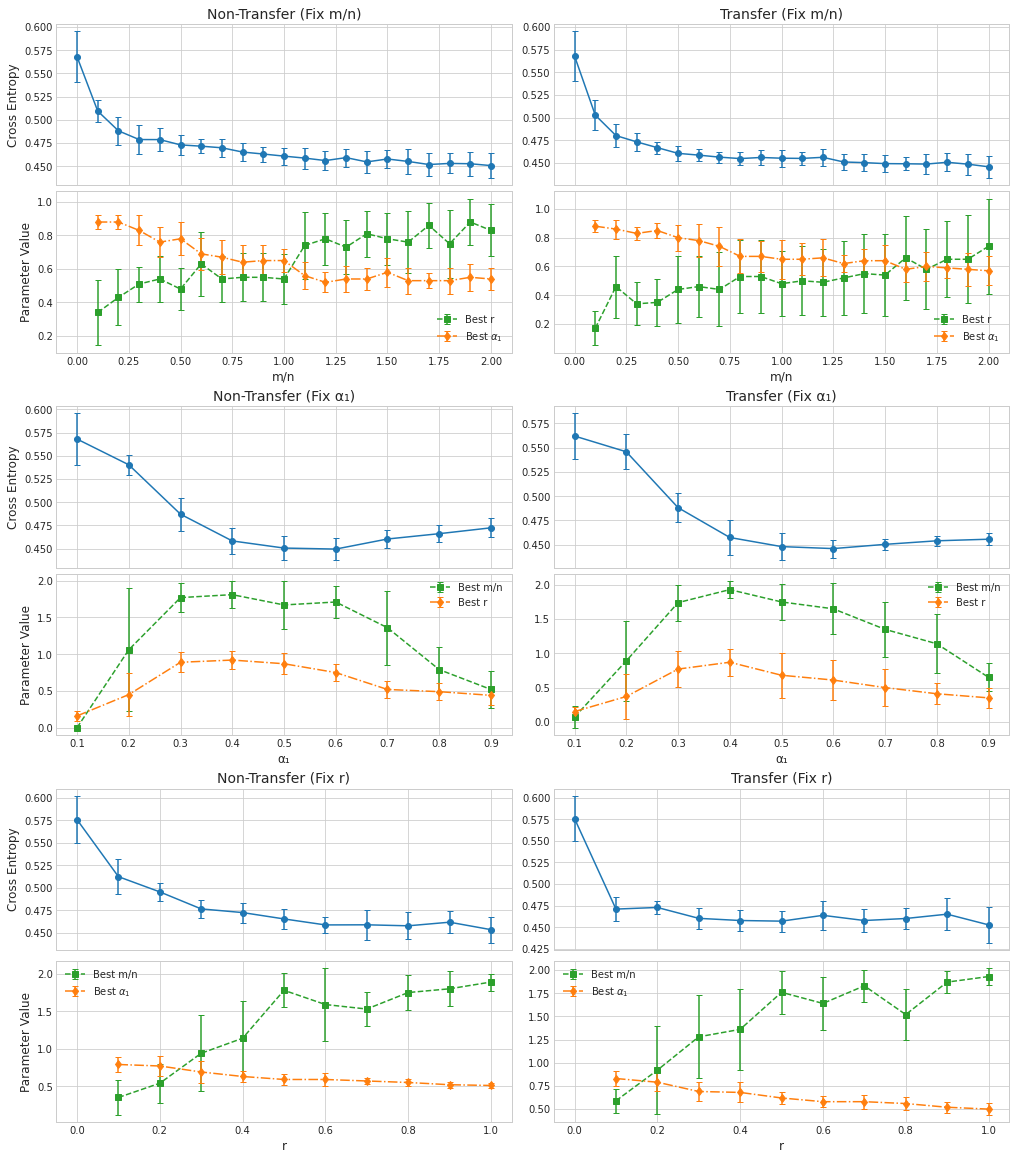

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')


# -------------------------------------------------------

# Use constrained_layout for nice packing
fig, axes = plt.subplots(6, 2, figsize=(14, 16), constrained_layout=True)

# Share X within each pair, hide top‐row xticks
for col in (0, 1):
    axes[1, col].sharex(axes[0, col])
    axes[3, col].sharex(axes[2, col])
    axes[5, col].sharex(axes[4, col])
    for row in (0, 2, 4):
        axes[row, col].tick_params(labelbottom=False)


param1_labels = ["r", "m/n", "m/n"]
param2_labels = [r"$\alpha_1$", "r",   r"$\alpha_1$"]

for i, (name, x_vals,
        ce_m_nt, ce_s_nt, p1_nt, s1_nt, p2_nt, s2_nt,
        ce_m_t,  ce_s_t,  p1_t,  s1_t,  p2_t,  s2_t) in enumerate(fixed_vars):

    top = 2 * i
    bot = top + 1

    # Top row: Cross‐Entropy
    axes[top, 0].errorbar(x_vals, ce_m_nt, yerr=ce_s_nt,
                          fmt='o-', color='tab:blue', capsize=3)
    axes[top, 0].set_title(f"Non-Transfer (Fix {name})",fontsize=14,)
    axes[top, 0].set_ylabel("Cross Entropy",fontsize=12)

    axes[top, 1].errorbar(x_vals, ce_m_t, yerr=ce_s_t,
                          fmt='o-', color='tab:blue', capsize=3)
    axes[top, 1].set_title(f"Transfer (Fix {name})",fontsize=14)

    # Bottom row: Best‐parameter curves
    axes[bot, 0].errorbar(x_vals, p1_nt, yerr=s1_nt,
                          fmt='s--', capsize=3, label=f"Best {param1_labels[i]}", color='tab:green')
    axes[bot, 0].errorbar(x_vals, p2_nt, yerr=s2_nt,
                          fmt='d-.', capsize=3, label=f"Best {param2_labels[i]}",color='tab:orange')
    axes[bot, 0].set_xlabel(name, fontsize=12)
    axes[bot, 0].set_ylabel("Parameter Value",fontsize=12)
    axes[bot, 0].legend()

    axes[bot, 1].errorbar(x_vals, p1_t, yerr=s1_t,
                          fmt='s--', capsize=3, label=f"Best {param1_labels[i]}", color='tab:green')
    axes[bot, 1].errorbar(x_vals, p2_t, yerr=s2_t,
                          fmt='d-.', capsize=3, label=f"Best {param2_labels[i]}",color='tab:orange')
    axes[bot, 1].set_xlabel(name,fontsize=12)
    axes[bot, 1].legend()

# Final grid + tick styling
for ax in axes.flatten():
    ax.grid(True)
    ax.tick_params(labelsize=10)
    
plt.savefig("toy_class.png", dpi=300)
plt.show()